In [1]:
import pandas as pd
from pathlib import Path
import json
import matplotlib.pyplot as plt

In [2]:
paths = Path("./").glob("*.json")
dfs = []
for path in paths:
    with open(path) as f:
        json_data = pd.json_normalize(json.loads(f.read()))
    dfs.append(json_data)
df = pd.concat(dfs, sort=False)
df.sort_values(by=['ts'], ascending=False, inplace=True)
df.head()

,ts,platform,ms_played,conn_country,ip_addr,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,...,audiobook_uri,audiobook_chapter_uri,audiobook_chapter_title,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
2087,2026-02-20T10:04:23Z,osx,208868,DE,37.4.254.240,these are my friends,lovelytheband,finding it hard to smile,spotify:track:3lPj2nA1lIrWIpbnhNG57v,NaN,...,NaN,NaN,NaN,trackdone,trackdone,False,False,False,1.771582e+09,False
2086,2026-02-20T10:00:53Z,osx,216693,DE,37.4.254.240,Blood // Water,grandson,Blood // Water,spotify:track:0AUyNF6iFxMNQsNx2nhtrw,NaN,...,NaN,NaN,NaN,trackdone,trackdone,False,False,False,1.771581e+09,False
2085,2026-02-20T09:57:15Z,osx,213312,DE,37.4.254.240,A Painting in Paris,Arrested Youth,Fear,spotify:track:4ytlkHbkpwhUCnSQnUrGmf,NaN,...,NaN,NaN,NaN,trackdone,trackdone,False,False,False,1.771581e+09,False
2084,2026-02-20T09:53:41Z,osx,206904,DE,37.4.254.240,Nothing Personal,Night Riots,Love Gloom,spotify:track:1TfVM1LqHWNK4TyuXc9OHT,NaN,...,NaN,NaN,NaN,clickrow,trackdone,False,False,False,1.771581e+09,False
2083,2026-02-20T09:50:13Z,osx,28424,DE,37.4.254.240,Still Dreaming,Sad Face,Still Dreaming,spotify:track:6klH3zaj3FYt6EecTechLY,NaN,...,NaN,NaN,NaN,trackdone,endplay,False,True,False,1.771572e+09,False


In [3]:
lifetime_ms_played = df["ms_played"].sum(numeric_only=True)
MS_TO_DAYS = 86_400_000
print(lifetime_ms_played / MS_TO_DAYS)


404.075045150463


In [4]:
skipped_songs_df = df[df["skipped"] == True]
skipped_songs_df.head(20)


,ts,platform,ms_played,conn_country,ip_addr,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,...,audiobook_uri,audiobook_chapter_uri,audiobook_chapter_title,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
2083,2026-02-20T09:50:13Z,osx,28424,DE,37.4.254.240,Still Dreaming,Sad Face,Still Dreaming,spotify:track:6klH3zaj3FYt6EecTechLY,NaN,...,NaN,NaN,NaN,trackdone,endplay,False,True,False,1.771572e+09,False
2072,2026-02-20T06:42:10Z,osx,25301,DE,37.4.254.240,Karma,Top Bunk,Karma,spotify:track:6fNok5TamH0BN4C8AhhZsg,NaN,...,NaN,NaN,NaN,clickrow,endplay,False,True,False,1.771570e+09,False
2071,2026-02-20T06:41:44Z,osx,1845,DE,37.4.254.240,Imaginary Friend,ABSRDST,Imaginary Friend,spotify:track:0r0w0HC1cKWbYkR6Sw8IVR,NaN,...,NaN,NaN,NaN,clickrow,endplay,False,True,False,1.771570e+09,False
2070,2026-02-20T06:41:42Z,osx,1845,DE,37.4.254.240,Down the Middle,Eyes on the Shore,A Golden Blue,spotify:track:38Nqrc5sO5sI1YZjFEWb0F,NaN,...,NaN,NaN,NaN,clickrow,endplay,False,True,False,1.771570e+09,False
2069,2026-02-20T06:41:39Z,osx,846,DE,37.4.254.240,Karma,Top Bunk,Karma,spotify:track:6fNok5TamH0BN4C8AhhZsg,NaN,...,NaN,NaN,NaN,remote,endplay,False,True,False,1.771570e+09,False
2064,2026-02-19T20:24:17Z,android,49744,DE,2a02:8108:4682:9a00:77ce:8191:cc06:267c,Lazer Queen,I Love You Honey Bunny,Cosmic Background Radiation,spotify:track:5TpSEUzaDD0UglNO3raY7S,NaN,...,NaN,NaN,NaN,trackdone,fwdbtn,False,True,False,1.771533e+09,False
2054,2026-02-19T19:43:33Z,android,83770,DE,2a02:8108:4682:9a00:77ce:8191:cc06:267c,Die Young,MRKTS,Die Young,spotify:track:7nezdixheqy2JvlCARoG6k,NaN,...,NaN,NaN,NaN,fwdbtn,endplay,False,True,False,1.771530e+09,False
2053,2026-02-19T19:42:09Z,android,176846,DE,2a02:8108:4682:9a00:77ce:8191:cc06:267c,High,Lokki,High,spotify:track:1Tw34hE2MgUYvG4iQwmWE4,NaN,...,NaN,NaN,NaN,trackdone,fwdbtn,False,True,False,1.771530e+09,False
2028,2026-02-19T15:17:11Z,osx,289,DE,37.4.254.240,Karma,Top Bunk,Karma,spotify:track:6fNok5TamH0BN4C8AhhZsg,NaN,...,NaN,NaN,NaN,clickrow,endplay,False,True,False,1.771514e+09,False
2027,2026-02-19T15:17:09Z,osx,146135,DE,37.4.254.240,Lying to Myself,Flight Risk,Flight Risk,spotify:track:3Nhv0tPzIfsAfUGnlGazY5,NaN,...,NaN,NaN,NaN,trackdone,endplay,False,True,False,1.771514e+09,False


<Figure size 1500x1000 with 0 Axes>

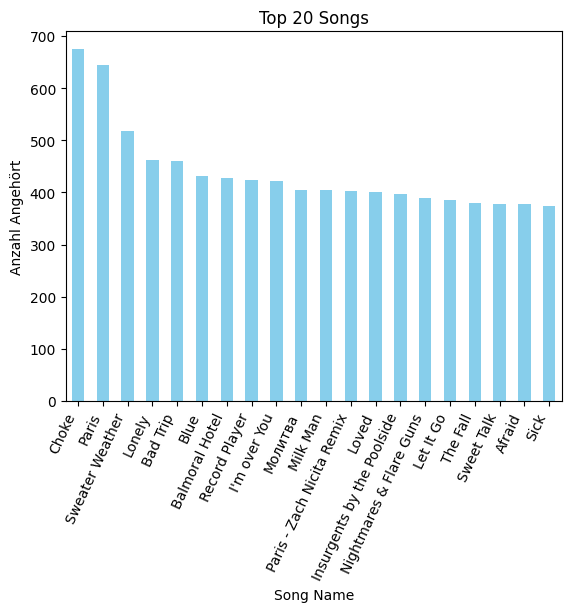

In [5]:
song_counts = df['master_metadata_track_name'].value_counts()

song_counts_df = song_counts.reset_index()
song_counts_df.columns = ['Song_Name', 'Count']

# Optional: Visualisierung als Balkendiagramm
plt.figure(figsize=(15, 10))
song_counts_df.head(20).plot(kind='bar', x='Song_Name', y='Count', legend=False, color='skyblue')
plt.title('Top 20 Songs')
plt.xlabel('Song Name')
plt.ylabel('Anzahl Angehört')
plt.xticks(rotation=65, ha='right')
plt.show()

<Figure size 1500x1000 with 0 Axes>

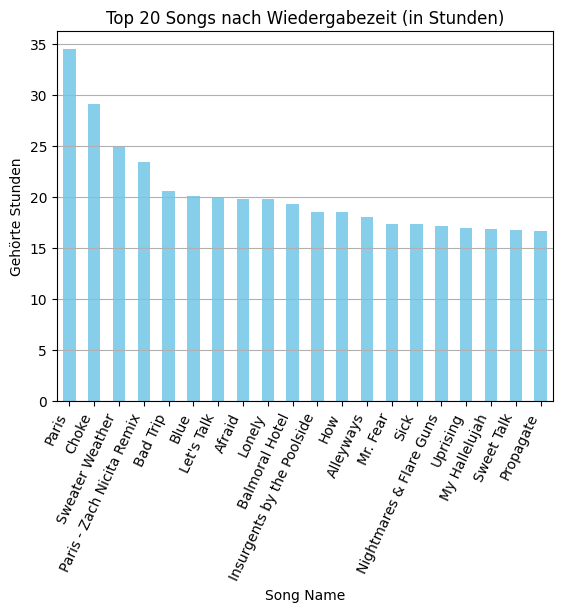

In [6]:
# Konvertiere 'ms_played' in Stunden und füge eine neue Spalte hinzu
df['Gehörte_Stunden'] = df['ms_played'] / 3_600_000  # 1 Stunde = 3.600.000 Millisekunden

# Gruppiere nach Song-Namen und summiere die gehörten Stunden
song_zeit = df.groupby('master_metadata_track_name')['Gehörte_Stunden'].sum().sort_values(ascending=False)

# Erstelle ein DataFrame für die Visualisierung
song_zeit_df = song_zeit.reset_index()
song_zeit_df.columns = ['Song_Name', 'Total_Hours']

# Optional: Visualisierung der Top 20 Songs
plt.figure(figsize=(15, 10))
song_zeit_df.head(20).plot(kind='bar', x='Song_Name', y='Total_Hours', legend=False, color='skyblue')
plt.title('Top 20 Songs nach Wiedergabezeit (in Stunden)')
plt.xlabel('Song Name')
plt.ylabel('Gehörte Stunden')
plt.xticks(rotation=65, ha='right')
plt.grid(axis='y')
plt.show()


<Figure size 1500x1000 with 0 Axes>

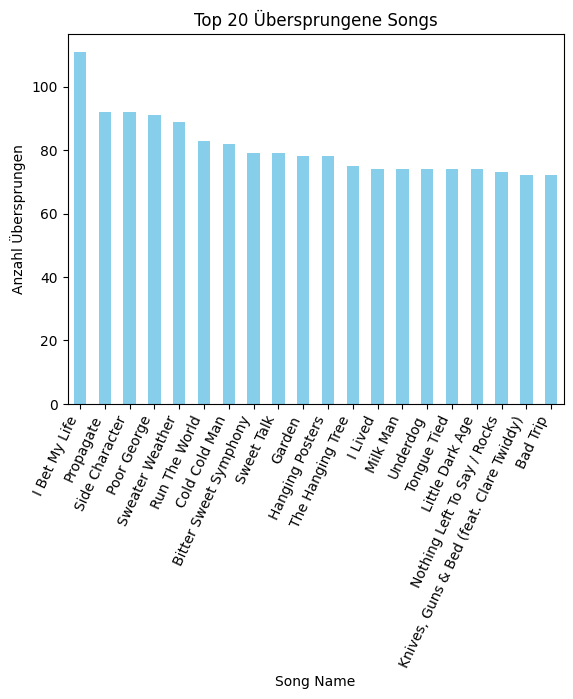

In [8]:
song_counts = skipped_songs_df['master_metadata_track_name'].value_counts()

song_counts_df = song_counts.reset_index()
song_counts_df.columns = ['Song_Name', 'Count']

# Optional: Visualisierung als Balkendiagramm
plt.figure(figsize=(15, 10))
song_counts_df.head(20).plot(kind='bar', x='Song_Name', y='Count', legend=False, color='skyblue')
plt.title('Top 20 Übersprungene Songs')
plt.xlabel('Song Name')
plt.ylabel('Anzahl Übersprungen')
plt.xticks(rotation=65, ha='right')
plt.show()

<Figure size 1500x1000 with 0 Axes>

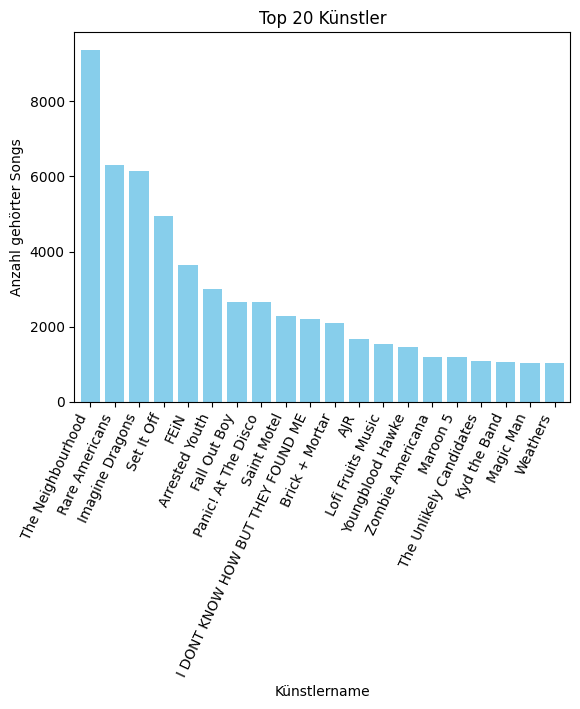

In [9]:
# top artists lifetime

artist_counts = df['master_metadata_album_artist_name'].value_counts()

artist_counts_df = artist_counts.reset_index()
artist_counts_df.columns = ['Artist_Name', 'Count']

# Optional: Visualisierung als Balkendiagramm
plt.figure(figsize=(15, 10))
artist_counts_df.head(20).plot(kind='bar', x='Artist_Name', y='Count', legend=False, color='skyblue', width=0.8)
plt.title('Top 20 Künstler')
plt.xlabel('Künstlername')
plt.ylabel('Anzahl gehörter Songs')
plt.xticks(rotation=65, ha='right')
plt.show()

<Figure size 1200x800 with 0 Axes>

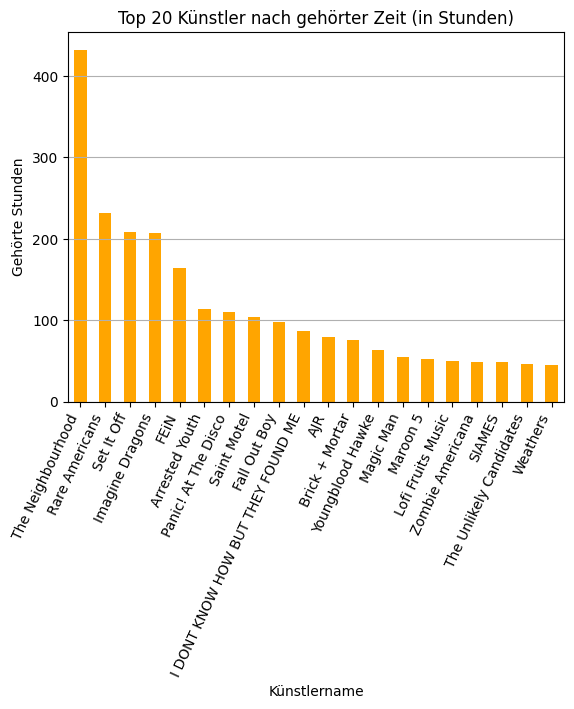

In [10]:
# TODO: top artists pro jahr
df['Gehörte_Stunden'] = df['ms_played'] / 3_600_000  # 1 Stunde = 3.600.000 Millisekunden

# Gruppieren nach Künstler und Summieren der gehörten Stunden
kuenstler_zeit = df.groupby('master_metadata_album_artist_name')['Gehörte_Stunden'].sum().sort_values(ascending=False)

# DataFrame erstellen für bessere Übersicht
kuenstler_zeit_df = kuenstler_zeit.reset_index()
kuenstler_zeit_df.columns = ['Artist_Name', 'Total_Hours']

# Visualisierung der Top 20 Künstler nach gehörter Zeit
plt.figure(figsize=(12, 8))
kuenstler_zeit_df.head(20).plot(kind='bar', x='Artist_Name', y='Total_Hours', legend=False, color='orange')
plt.title('Top 20 Künstler nach gehörter Zeit (in Stunden)')
plt.xlabel('Künstlername')
plt.ylabel('Gehörte Stunden')
plt.xticks(rotation=65, ha='right')
plt.grid(axis='y')
plt.show()

/var/folders/y3/ptpqqzqn1ss9f244m2l61ws00000gn/T/ipykernel_2339/3852685883.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Monat_Jahr'] = df['ts'].dt.to_period('M')


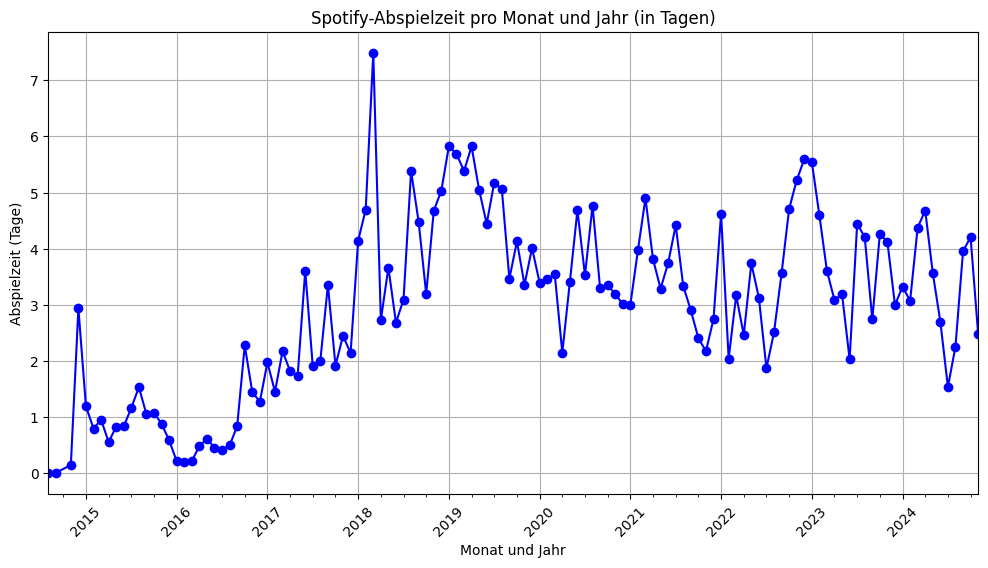

In [11]:
df['ts'] = pd.to_datetime(df['ts'])  

# Erstelle eine neue Spalte, die Monat und Jahr kombiniert
df['Monat_Jahr'] = df['ts'].dt.to_period('M')

# Konvertiere die Abspielzeit von Millisekunden zu Stunden (ersetze 'abspielzeit_spalte' durch den tatsächlichen Namen)
df['Abspielzeit_Stunden'] = df['ms_played'] / MS_TO_DAYS  

# Gruppiere nach 'Monat_Jahr' und summiere die Abspielzeit pro Monat
monatliche_abspielzeit = df.groupby('Monat_Jahr')['Abspielzeit_Stunden'].sum()

# Visualisierung der Abspielzeit
plt.figure(figsize=(12, 6))
monatliche_abspielzeit.plot(kind='line', marker='o', color='blue')
plt.title('Spotify-Abspielzeit pro Monat und Jahr (in Tagen)')
plt.xlabel('Monat und Jahr')
plt.ylabel('Abspielzeit (Tage)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# IDEAS
- Wie viele einzigartige Songs
- Wie viele neue Songs pro Jahr/Monat

In [12]:
# Wie viele einzigartige songs
unique_songs_df = df.drop_duplicates(subset="master_metadata_track_name")
len(unique_songs_df)

14165

Jahr
2014     187
2015     699
2016    1033
2017    2292
2018    3800
2019    2838
2020    2810
2021    2806
2022    3553
2023    3140
2024    2510
Name: master_metadata_track_name, dtype: int64


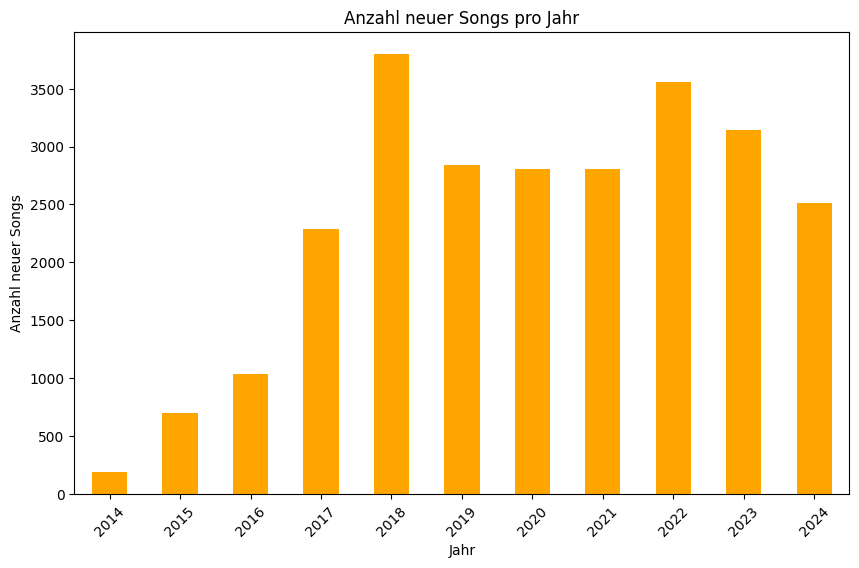

In [13]:
# Jahr extrahieren
df['Jahr'] = df['ts'].dt.year

# Entfernen von Duplikaten: Jeder Song zählt nur einmal pro Jahr
einzigartige_songs_pro_jahr = df.drop_duplicates(subset=['Jahr', 'master_metadata_track_name'])

# Anzahl der einzigartigen Songs pro Jahr berechnen
neue_songs_pro_jahr = einzigartige_songs_pro_jahr.groupby('Jahr')['master_metadata_track_name'].count()

# Ausgabe
print(neue_songs_pro_jahr)

plt.figure(figsize=(10, 6))
neue_songs_pro_jahr.plot(kind='bar', color='orange')
plt.title('Anzahl neuer Songs pro Jahr')
plt.xlabel('Jahr')
plt.ylabel('Anzahl neuer Songs')
plt.xticks(rotation=45)
plt.show()

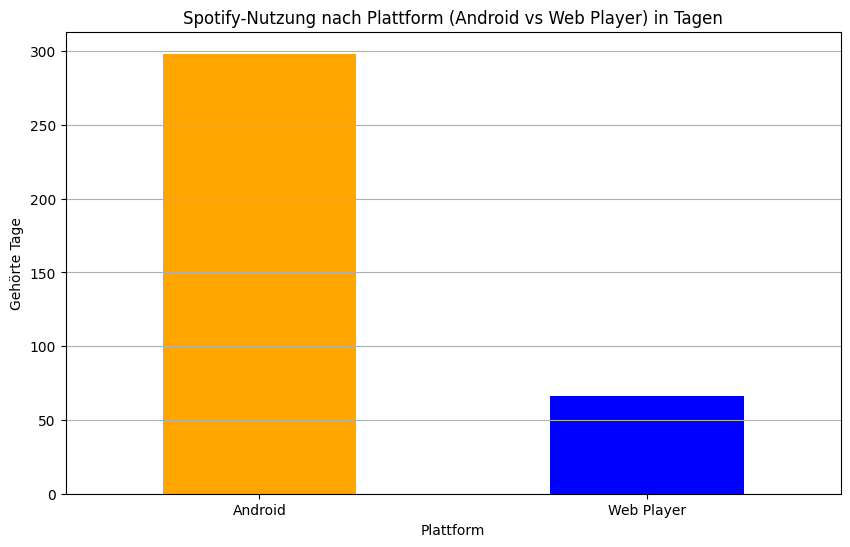

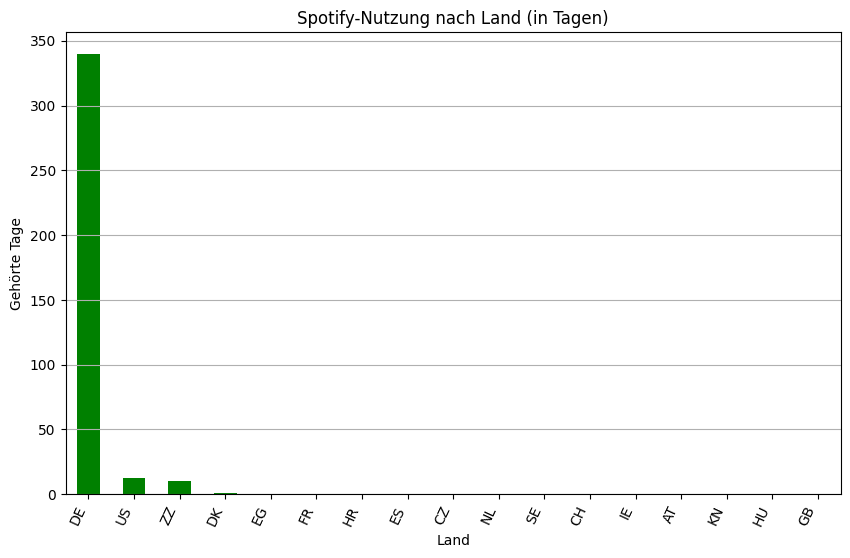

In [14]:
# Konvertiere 'ms_played' in Tage (1 Tag = 86.400.000 Millisekunden)
df['Gehörte_Tage'] = df['ms_played'] / MS_TO_DAYS  # 1 Tag = 86.400.000 Millisekunden

# ------------------- Plattform-Gruppierung -------------------
# Gruppiere Plattformen nach 'Android' und 'Web Player' (alles andere)
df['Plattform_Gruppiert'] = df['platform'].apply(lambda x: 'Android' if 'android' in x.lower() else 'Web Player')

# Gruppiere nach der neuen Spalte und summiere die gehörte Zeit in Tagen
plattform_zeit = df.groupby('Plattform_Gruppiert')['Gehörte_Tage'].sum().sort_values(ascending=False)

# Visualisierung der gruppierten Plattform-Nutzung
plt.figure(figsize=(10, 6))
plattform_zeit.plot(kind='bar', color=['orange', 'blue'])
plt.title('Spotify-Nutzung nach Plattform (Android vs Web Player) in Tagen')
plt.xlabel('Plattform')
plt.ylabel('Gehörte Tage')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# ------------------- Länder-Analyse -------------------
# Gruppiere nach Land und summiere die gehörte Zeit in Tagen
land_zeit = df.groupby('conn_country')['Gehörte_Tage'].sum().sort_values(ascending=False)

# Visualisierung der Länder-Nutzung
plt.figure(figsize=(10, 6))
land_zeit.plot(kind='bar', color='green')
plt.title('Spotify-Nutzung nach Land (in Tagen)')
plt.xlabel('Land')
plt.ylabel('Gehörte Tage')
plt.xticks(rotation=65, ha='right')
plt.grid(axis='y')
plt.show()

/var/folders/y3/ptpqqzqn1ss9f244m2l61ws00000gn/T/ipykernel_2339/3490197204.py:49: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Monat_Jahr'] = df['ts'].dt.to_period('M')
/var/folders/y3/ptpqqzqn1ss9f244m2l61ws00000gn/T/ipykernel_2339/3490197204.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_kuenstler_zeit['Monat_Jahr'] = top_5_kuenstler_zeit['Monat_Jahr'].dt.to_timestamp()


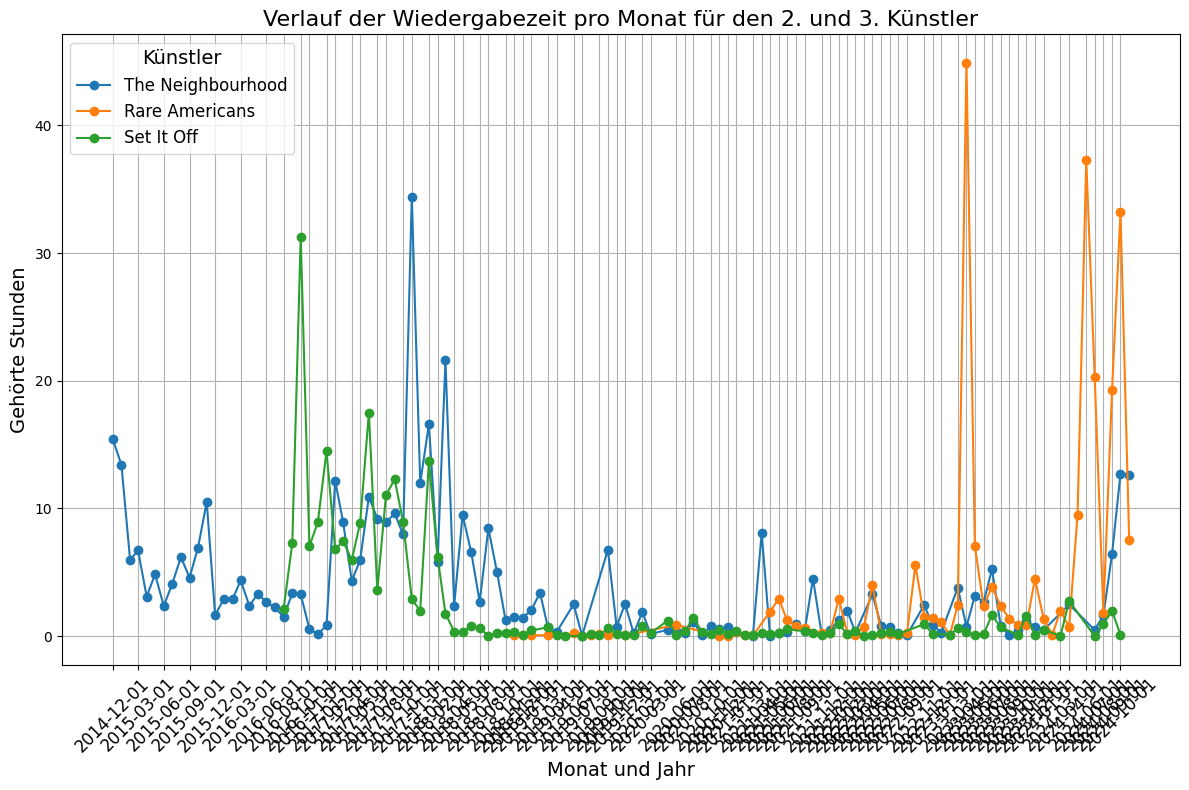

In [15]:
# Konvertiere 'ms_played' in Stunden
# df['Gehörte_Stunden'] = df['ms_played'] / 3_600_000  # 1 Stunde = 3.600.000 Millisekunden

# # Erstelle eine Spalte für den Monat und Jahr (als Datetime)
# df['Monat_Jahr'] = df['ts'].dt.to_period('M')

# # Gruppiere nach Künstler und Monat und summiere die gehörte Zeit in Stunden
# kuenstler_monatliche_zeit = df.groupby(['Monat_Jahr', 'master_metadata_album_artist_name'])['Gehörte_Stunden'].sum().reset_index()

# # Top 5 Künstler nach gesamter Wiedergabezeit berechnen
# gesamt_zeit_kuenstler = df.groupby('master_metadata_album_artist_name')['Gehörte_Stunden'].sum()
# top_5_kuenstler = gesamt_zeit_kuenstler.nlargest(5).index

# # Filtere die Daten für die Top 2 und 3 Künstler
# top_5_kuenstler_zeit = kuenstler_monatliche_zeit[kuenstler_monatliche_zeit['master_metadata_album_artist_name'].isin(top_5_kuenstler)]

# # Stelle sicher, dass die Daten nach Monat/Jahr sortiert sind
# top_5_kuenstler_zeit['Monat_Jahr'] = top_5_kuenstler_zeit['Monat_Jahr'].dt.to_timestamp()  # Konvertiere Perioden in Timestamp
# top_5_kuenstler_zeit = top_5_kuenstler_zeit.sort_values(by=['Monat_Jahr'])

# # Visualisierung: Verlauf der Wiedergabezeit pro Monat für den zweiten und dritten Künstler
# plt.figure(figsize=(12, 8))

# # Für jeden der Top 2 und 3 Künstler eine Linie im Plot zeichnen
# for artist in top_5_kuenstler:
#     artist_data = top_5_kuenstler_zeit[top_5_kuenstler_zeit['master_metadata_album_artist_name'] == artist]
#     plt.plot(artist_data['Monat_Jahr'], artist_data['Gehörte_Stunden'], marker='o', label=artist)

# plt.title('Verlauf der Wiedergabezeit pro Monat für Top 5 Künstler')
# plt.xlabel('Monat und Jahr')
# plt.ylabel('Gehörte Stunden')
# plt.xticks(rotation=45, fontsize=12)
# plt.xticks(top_5_kuenstler['Monat_Jahr'][::3].astype(str), rotation=45)

# # Verkleinerte Legende und Achsenbeschriftungen
# plt.legend(title='Künstler', fontsize=12, title_fontsize=14)

# # Optimierung der Layouts
# plt.tight_layout()

# # Grid und Anzeige des Plots
# plt.grid(True)
# plt.show()


# Beispielhafte Berechnung der 'Monat_Jahr' Spalte und der 'Gehörte_Stunden' für jeden Künstler
# Verwendet df mit den richtigen Spalten
df['Gehörte_Stunden'] = df['ms_played'] / 3_600_000  # ms in Stunden umrechnen
df['Monat_Jahr'] = df['ts'].dt.to_period('M')

# Gruppiere nach Monat und Künstler und berechne die gehörte Zeit
kuenstler_monatliche_zeit = df.groupby(['Monat_Jahr', 'master_metadata_album_artist_name'])['Gehörte_Stunden'].sum().reset_index()

# Top 5 Künstler nach gesamter Wiedergabezeit berechnen
gesamt_zeit_kuenstler = df.groupby('master_metadata_album_artist_name')['Gehörte_Stunden'].sum()
top_5_kuenstler = gesamt_zeit_kuenstler.nlargest(3).index


top_5_kuenstler_zeit = kuenstler_monatliche_zeit[kuenstler_monatliche_zeit['master_metadata_album_artist_name'].isin(top_5_kuenstler)]

# Stelle sicher, dass 'Monat_Jahr' als Timestamp vorliegt
top_5_kuenstler_zeit['Monat_Jahr'] = top_5_kuenstler_zeit['Monat_Jahr'].dt.to_timestamp()

# Sortiere nach 'Monat_Jahr'
top_5_kuenstler_zeit = top_5_kuenstler_zeit.sort_values(by=['Monat_Jahr'])

# Visualisierung: Verlauf der Wiedergabezeit pro Monat für die Top 2 und 3 Künstler
plt.figure(figsize=(12, 8))

# Für jeden der Top 2 und 3 Künstler eine Linie im Plot zeichnen
for artist in top_5_kuenstler:
    artist_data = top_5_kuenstler_zeit[top_5_kuenstler_zeit['master_metadata_album_artist_name'] == artist]
    plt.plot(artist_data['Monat_Jahr'], artist_data['Gehörte_Stunden'], marker='o', label=artist)

# Titel und Achsenbeschriftungen
plt.title('Verlauf der Wiedergabezeit pro Monat für den 2. und 3. Künstler', fontsize=16)
plt.xlabel('Monat und Jahr', fontsize=14)
plt.ylabel('Gehörte Stunden', fontsize=14)

# Reduziere die Markierungen auf der x-Achse (z.B. nur alle 3 Monate anzeigen)
plt.xticks(rotation=45, fontsize=12)
plt.xticks(top_5_kuenstler_zeit['Monat_Jahr'][::3].astype(str), rotation=45)

# Verkleinerte Legende und Achsenbeschriftungen
plt.legend(title='Künstler', fontsize=12, title_fontsize=14)

# Optimierung der Layouts
plt.tight_layout()

# Grid und Anzeige des Plots
plt.grid(True)
plt.show()

/var/folders/y3/ptpqqzqn1ss9f244m2l61ws00000gn/T/ipykernel_17117/3383900695.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Monat_Jahr'] = df['ts'].dt.to_period('M')


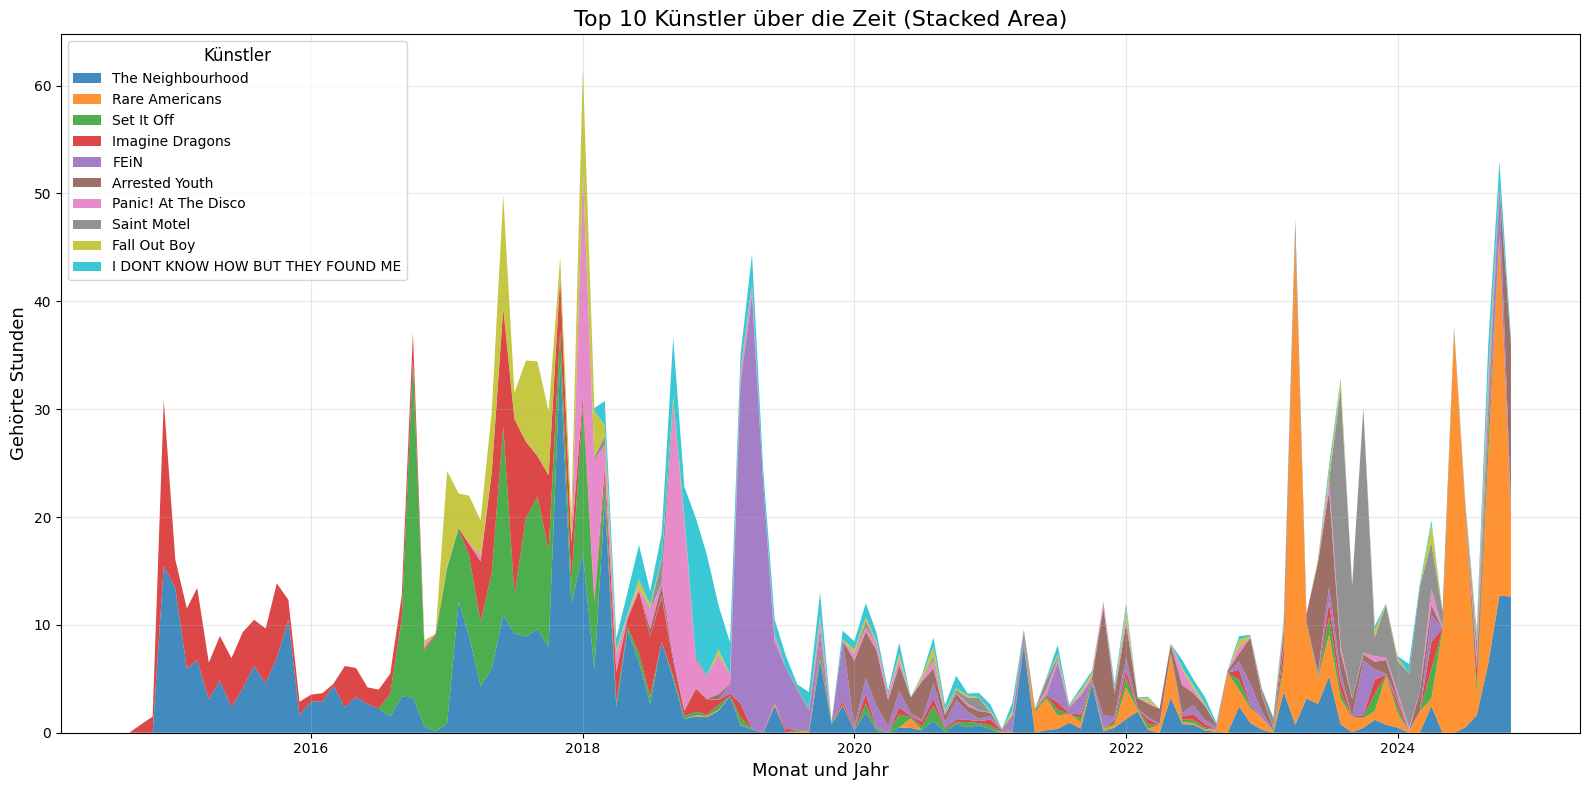

In [8]:
# Top 10 Künstler als Stacked Area Chart über die Zeit
df['ts'] = pd.to_datetime(df['ts'])
df['Gehörte_Stunden'] = df['ms_played'] / 3_600_000
df['Monat_Jahr'] = df['ts'].dt.to_period('M')

# Gehörte Stunden pro Monat und Künstler
kuenstler_monatlich = df.groupby(['Monat_Jahr', 'master_metadata_album_artist_name'])['Gehörte_Stunden'].sum().reset_index()

# Top 10 Künstler nach gesamter Wiedergabezeit
top_10 = df.groupby('master_metadata_album_artist_name')['Gehörte_Stunden'].sum().nlargest(10).index

# Pivot: Monate als Zeilen, Künstler als Spalten
pivot = kuenstler_monatlich[kuenstler_monatlich['master_metadata_album_artist_name'].isin(top_10)] \
    .pivot_table(index='Monat_Jahr', columns='master_metadata_album_artist_name', values='Gehörte_Stunden', fill_value=0)

# Sortiere Spalten nach Gesamtzeit (meistgehört zuerst unten)
pivot = pivot[pivot.sum().sort_values(ascending=False).index]
pivot.index = pivot.index.to_timestamp()

fig, ax = plt.subplots(figsize=(16, 8))
ax.stackplot(pivot.index, pivot.T.values, labels=pivot.columns, alpha=0.85)

ax.set_title('Top 10 Künstler über die Zeit (Stacked Area)', fontsize=16)
ax.set_xlabel('Monat und Jahr', fontsize=13)
ax.set_ylabel('Gehörte Stunden', fontsize=13)
ax.legend(loc='upper left', fontsize=10, title='Künstler', title_fontsize=12)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


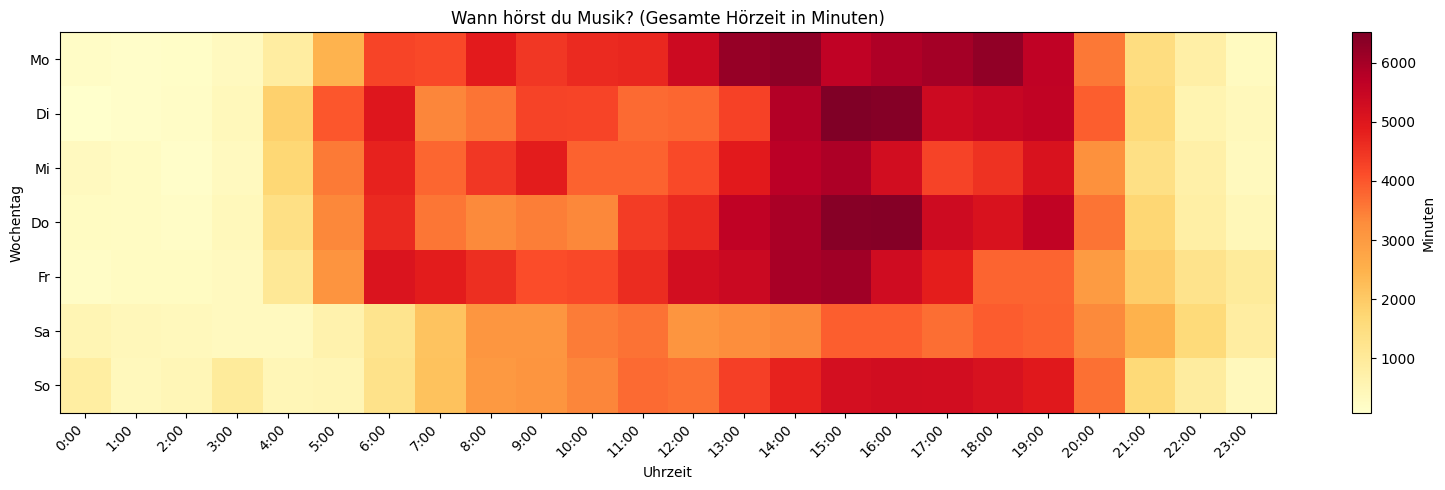

In [7]:
import numpy as np

# ts wurde in früheren Zellen zu Period konvertiert, daher zurück zu datetime
df['ts'] = pd.to_datetime(df['ts'])

# Stunde und Wochentag extrahieren
df['Stunde'] = df['ts'].dt.hour
df['Wochentag'] = df['ts'].dt.dayofweek  # 0=Montag, 6=Sonntag

wochentag_namen = ['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So']

# Heatmap-Daten: Gesamte Hörzeit in Minuten pro Wochentag + Stunde
heatmap_data = df.groupby(['Wochentag', 'Stunde'])['ms_played'].sum().unstack(fill_value=0) / 60_000

fig, ax = plt.subplots(figsize=(16, 5))
im = ax.imshow(heatmap_data.values, aspect='auto', cmap='YlOrRd', interpolation='nearest')

ax.set_yticks(range(7))
ax.set_yticklabels(wochentag_namen)
ax.set_xticks(range(24))
ax.set_xticklabels([f'{h}:00' for h in range(24)], rotation=45, ha='right')
ax.set_xlabel('Uhrzeit')
ax.set_ylabel('Wochentag')
ax.set_title('Wann hörst du Musik? (Gesamte Hörzeit in Minuten)')

cbar = fig.colorbar(im, ax=ax, label='Minuten')
plt.tight_layout()
plt.show()


/var/folders/y3/ptpqqzqn1ss9f244m2l61ws00000gn/T/ipykernel_17117/3232918681.py:13: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_sorted['Monat'] = df_sorted['ts'].dt.to_period('M')


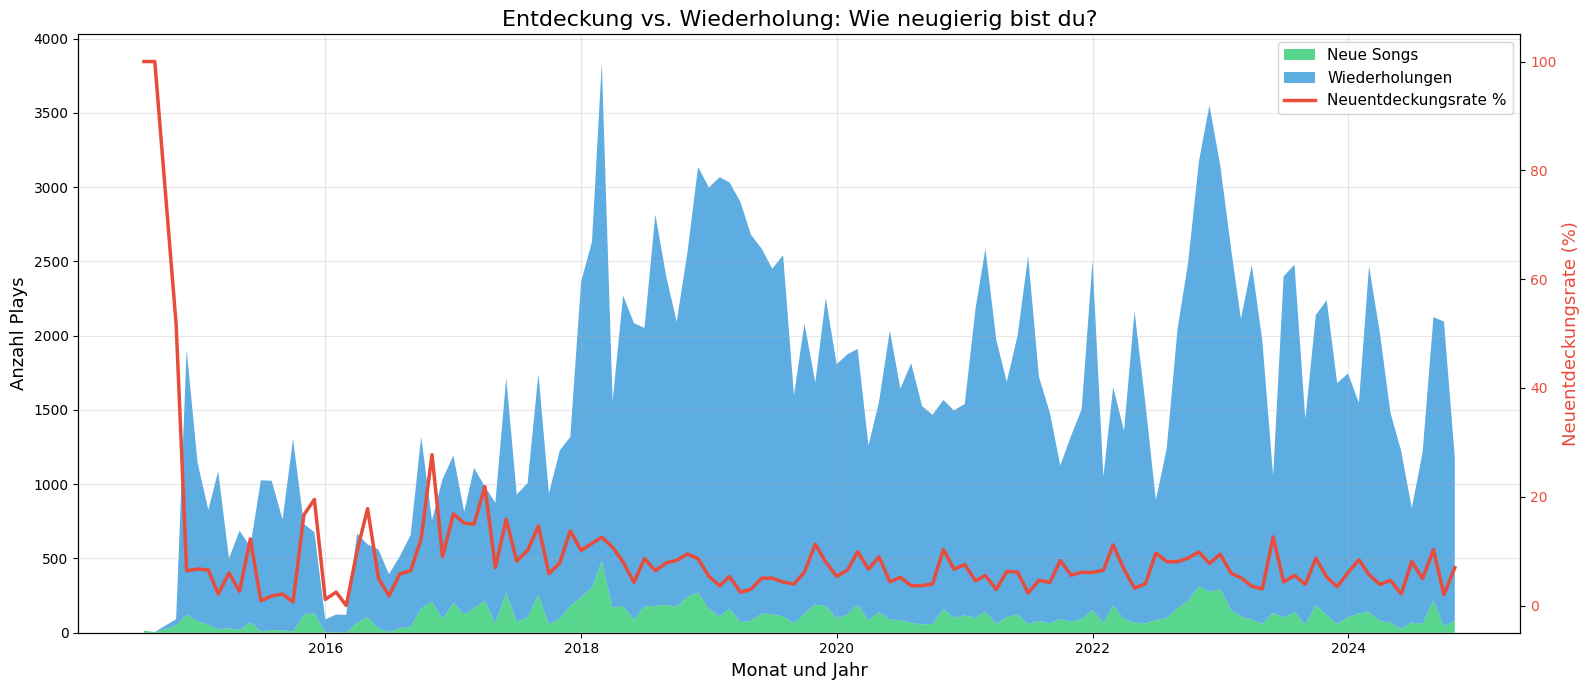

In [9]:
# Entdeckung vs. Wiederholung: Wie viel % deiner monatlichen Plays sind "neue" Songs?
df['ts'] = pd.to_datetime(df['ts'])
df_sorted = df.sort_values('ts')

# Für jeden Play bestimmen: Wurde dieser Song schon einmal gehört?
bereits_gehoert = set()
ist_neu = []
for track in df_sorted['master_metadata_track_name']:
    ist_neu.append(track not in bereits_gehoert)
    bereits_gehoert.add(track)

df_sorted['ist_neu'] = ist_neu
df_sorted['Monat'] = df_sorted['ts'].dt.to_period('M')

# Pro Monat: Anteil neuer Songs vs. Wiederholungen
monatlich = df_sorted.groupby('Monat')['ist_neu'].agg(['sum', 'count'])
monatlich.columns = ['Neue_Songs', 'Gesamt_Plays']
monatlich['Wiederholungen'] = monatlich['Gesamt_Plays'] - monatlich['Neue_Songs']
monatlich['Neuentdeckung_%'] = (monatlich['Neue_Songs'] / monatlich['Gesamt_Plays']) * 100
monatlich.index = monatlich.index.to_timestamp()

fig, ax1 = plt.subplots(figsize=(16, 7))

# Stacked Area: Neue Songs vs. Wiederholungen
ax1.stackplot(monatlich.index,
              monatlich['Neue_Songs'], monatlich['Wiederholungen'],
              labels=['Neue Songs', 'Wiederholungen'],
              colors=['#2ecc71', '#3498db'], alpha=0.8)
ax1.set_ylabel('Anzahl Plays', fontsize=13)
ax1.set_xlabel('Monat und Jahr', fontsize=13)

# Zweite Y-Achse: Neuentdeckungsrate als Linie
ax2 = ax1.twinx()
ax2.plot(monatlich.index, monatlich['Neuentdeckung_%'],
         color='#e74c3c', linewidth=2.5, label='Neuentdeckungsrate %')
ax2.set_ylabel('Neuentdeckungsrate (%)', fontsize=13, color='#e74c3c')
ax2.tick_params(axis='y', labelcolor='#e74c3c')

# Legende kombinieren
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=11)

ax1.set_title('Entdeckung vs. Wiederholung: Wie neugierig bist du?', fontsize=16)
ax1.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
